In [ ]:
from google.colab import drive
drive.mount('/content/drive')

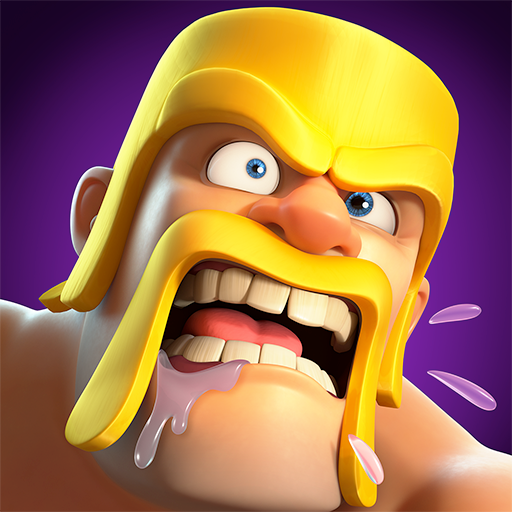

In [ ]:
from PIL import Image
image = Image.open("/content/drive/MyDrive/Workshop1/unnamed.png")
display(image)

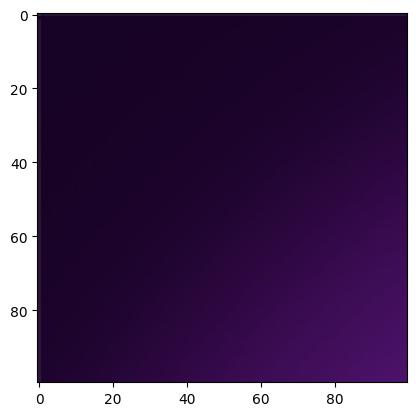

In [ ]:
import matplotlib.pyplot as plt

image = plt.imread("/content/drive/MyDrive/Workshop1/unnamed.png")
top_left = image[:100, :100]

plt.imshow(top_left)
plt.show()



Shape of the image array: (512, 512, 4)


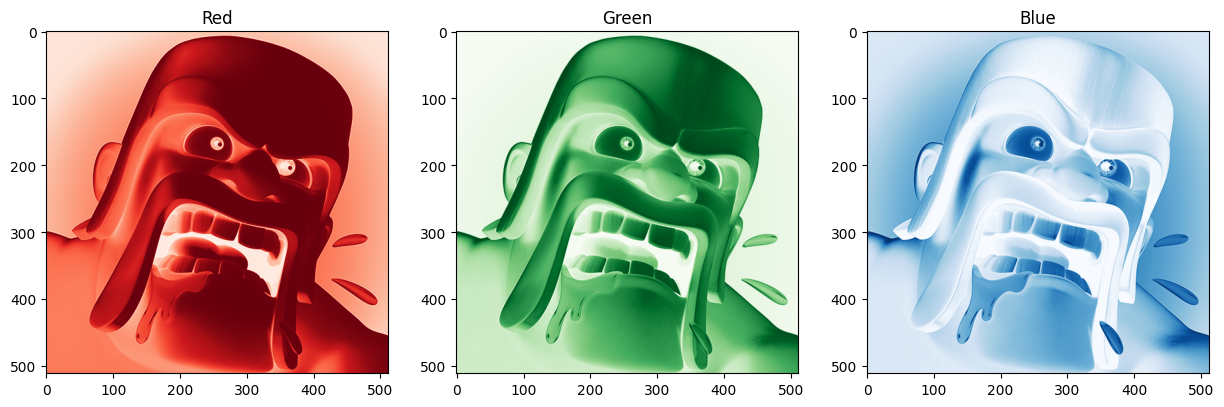

In [ ]:

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load Image
image = Image.open("/content/drive/MyDrive/Workshop1/unnamed.png")
image_array_colored = np.array(image)

print("Shape of the image array:", image_array_colored.shape)
red_channel = image_array_colored[:, :, 0]
green_channel = image_array_colored[:, :, 1]
blue_channel = image_array_colored[:, :, 2]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(red_channel, cmap='Reds')
axes[0].set_title("Red")
axes[1].imshow(green_channel, cmap='Greens')
axes[1].set_title("Green")
axes[2].imshow(blue_channel, cmap='Blues')
axes[2].set_title("Blue")

plt.show()


In [ ]:
width , height = image . size
channels = len( image . getbands () )
print ( f" Image shape (RGB): ({ height } , { width } , { channels })")
image_size_colored = width * height *3
print ( f" Image size (RGB): { image_size_colored }")

 Image shape (RGB): (512 , 512 , 4)
 Image size (RGB): 786432


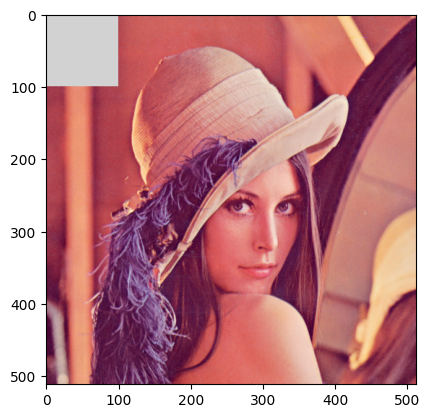

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image1 = Image.open("/content/drive/MyDrive/Workshop1/Copy of Lenna_(test_image).png")

image_array1 = np.array(image1)
image_array1[:100, :100] = [210, 210, 210]  # RGB Light Gray
modified_image = Image.fromarray(image_array1)
plt.imshow(modified_image)
plt.show()

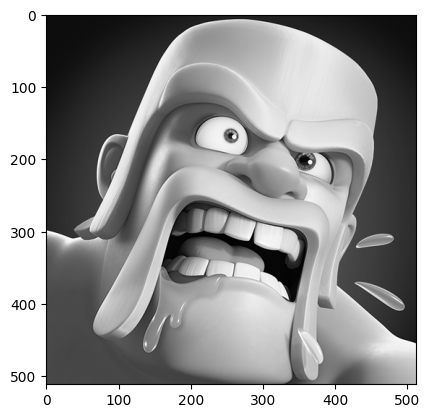

In [ ]:
image = Image.open("/content/drive/MyDrive/Workshop1/unnamed.png")
gray_image = image.convert("L")
plt.imshow(gray_image, cmap="gray")
plt.show()

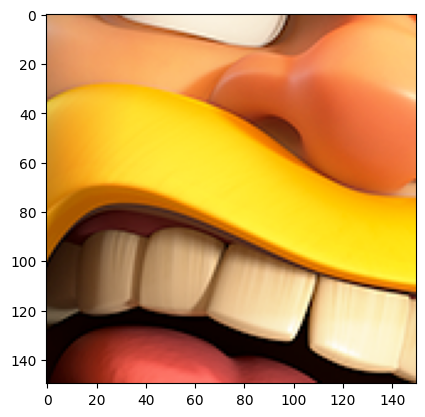

In [ ]:
image_array = np.array(image)
# dimensions of the image
height, width = image_array.shape[:2]
top_left_y = (height - 150) // 2
top_left_x = (width - 150) // 2
center_section = image_array[top_left_y:top_left_y+150, top_left_x:top_left_x+150]
plt.imshow(center_section)
plt.show()

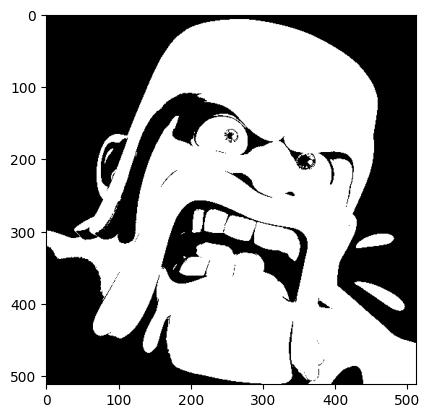

In [ ]:
gray_image = image.convert("L")
binary_image = np.where(image_array < 100, 0, 255)
plt.imshow(binary_image, cmap="gray")
plt.show()

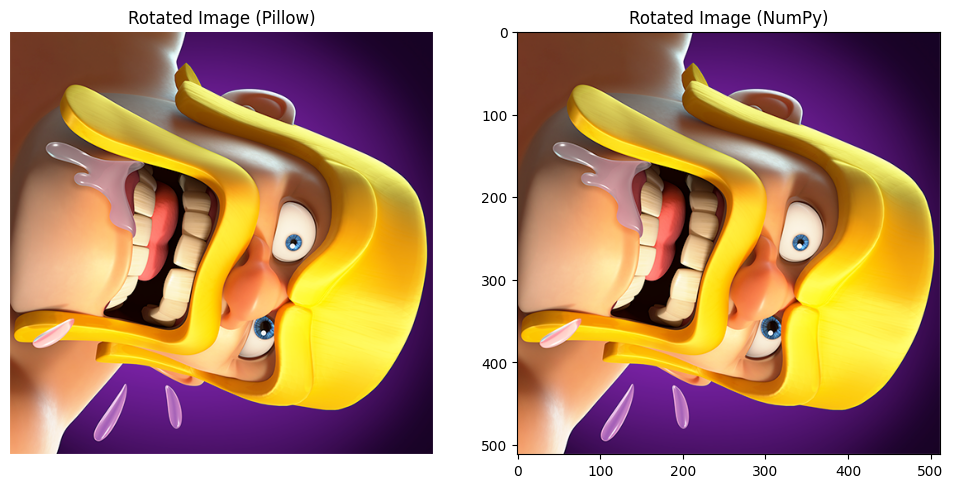

In [ ]:
rotated_image_pillow = image.rotate(-90)


image_array = np.array(image)
rotated_image_array = np.transpose(image_array, (1, 0, 2))
rotated_image_array = np.flip(rotated_image_array, axis=1)

# Display the rotated images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(rotated_image_pillow)
ax[0].set_title("Rotated Image (Pillow)")
ax[0].axis("off")

ax[1].imshow(rotated_image_array)
ax[1].set_title("Rotated Image (NumPy)")
plt.show()

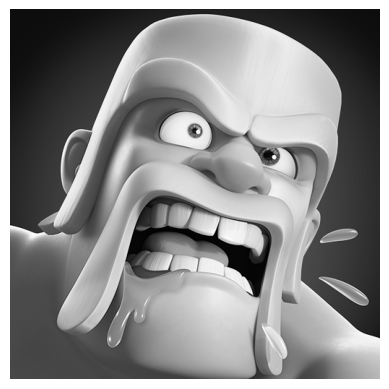

In [ ]:
gray_image = image.convert("L")

gray_array = np.array(gray_image)
rgb_image_array = np.stack([gray_array] * 3, axis=-1)

plt.imshow(rgb_image_array)
plt.axis("off")
plt.show()

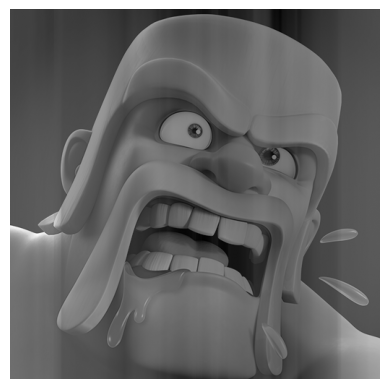

Covariance Matrix Shape: (512, 512)


In [ ]:


image_array = np.array(gray_image)
mean_image = np.mean(image_array, axis=0)
centered_image = image_array - mean_image

std_image = np.std(centered_image, axis=0)
standardized_image = centered_image / std_image
covariance_matrix = np.cov(standardized_image.T)  # Transpose for covariance computation

# Display the image and print covariance matrix shape
plt.imshow(standardized_image, cmap="gray")
plt.axis("off")
plt.show()

print("Covariance Matrix Shape:", covariance_matrix.shape)


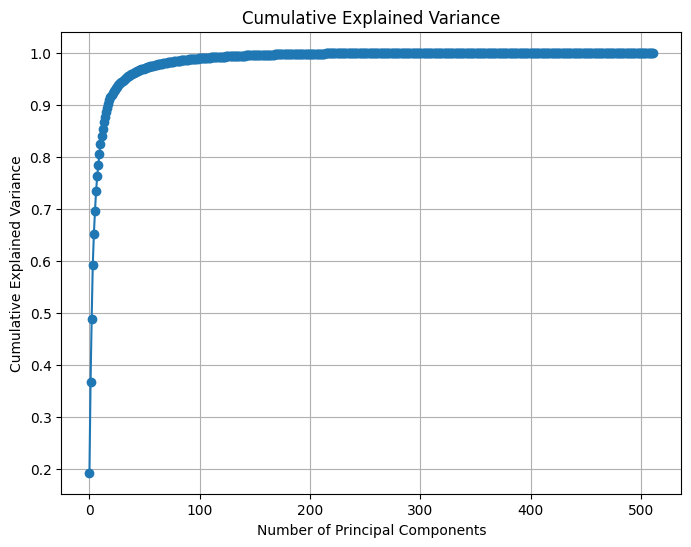

Sorted Eigenvalues: [ 9.87643599e+01  8.97303016e+01  6.19153070e+01  5.30733641e+01
  3.07613870e+01  2.27164088e+01  1.93843067e+01  1.49150703e+01
  1.13835496e+01  1.06551531e+01  1.00357107e+01  7.90947208e+00
  6.70383177e+00  6.31678500e+00  5.63523059e+00  4.94441658e+00
  4.11301332e+00  3.86855330e+00  3.68258014e+00  2.56997354e+00
  2.32602325e+00  1.88562651e+00  1.78498515e+00  1.62018480e+00
  1.48256431e+00  1.37063300e+00  1.34251275e+00  1.24012295e+00
  1.15809183e+00  1.11177746e+00  1.03540254e+00  9.32108447e-01
  8.84102455e-01  8.71943165e-01  7.85328091e-01  7.68611289e-01
  7.18231957e-01  6.93534914e-01  6.88355770e-01  6.42967036e-01
  6.08726008e-01  5.86292439e-01  5.50276608e-01  5.01954796e-01
  4.89161667e-01  4.74208611e-01  4.40088111e-01  4.37852456e-01
  4.18026700e-01  4.05924011e-01  3.84181154e-01  3.73400337e-01
  3.68704626e-01  3.38386118e-01  3.30160508e-01  3.12674717e-01
  3.02302622e-01  2.96881574e-01  2.81179478e-01  2.78625592e-01
  2.7

In [ ]:

image_array = np.array(gray_image)

mean_image = np.mean(image_array, axis=0)  # Mean of each column (if it's 2D image)
centered_image = image_array - mean_image
std_image = np.std(centered_image, axis=0)  # Standard deviation of each column
standardized_image = centered_image / std_image

# Step 3: Calculate the covariance matrix
covariance_matrix = np.cov(standardized_image.T)  # Transpose for covariance computation

# Step 4: Eigen Decomposition
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

# Step 5: Sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]  # Indices to sort eigenvalues in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Step 6: Calculate the cumulative sum of the sorted eigenvalues (explained variance)
cumulative_explained_variance = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

# Step 7: Plot the cumulative explained variance to determine how many components to keep
plt.figure(figsize=(8, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Print sorted eigenvalues and explain variance for debugging
print("Sorted Eigenvalues:", sorted_eigenvalues)
print("Cumulative Explained Variance:", cumulative_explained_variance)

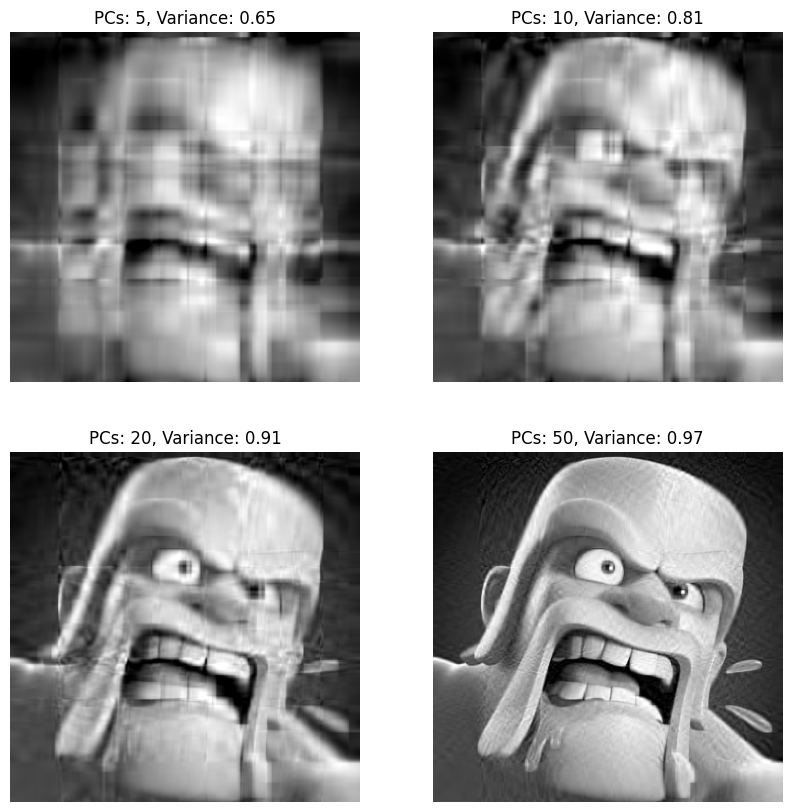

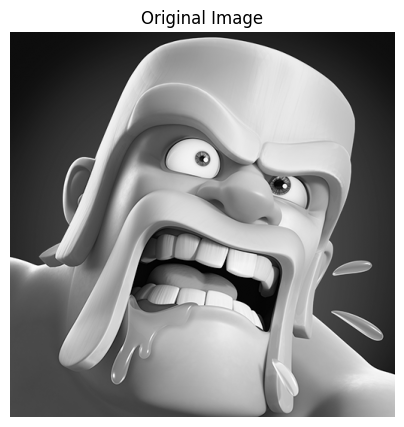

PCs: 5 | MSE: 1250.07 | SSIM: 0.6135
PCs: 10 | MSE: 684.46 | SSIM: 0.6501
PCs: 20 | MSE: 302.84 | SSIM: 0.7242
PCs: 50 | MSE: 110.23 | SSIM: 0.7965


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim

# Load the image and convert to grayscale (if it's in color)
image = Image.open("/content/drive/MyDrive/Workshop1/unnamed.png")
gray_image = image.convert("L")  # Convert to grayscale

# Convert the grayscale image to a NumPy array
image_array = np.array(gray_image)

# Step 1: Centering the data (subtract the mean from each pixel value)
mean_image = np.mean(image_array, axis=0)  # Mean of each column (if it's 2D image)
centered_image = image_array - mean_image

# Step 2: Standardize the data (divide by the standard deviation for each pixel)
std_image = np.std(centered_image, axis=0)  # Standard deviation of each column
standardized_image = centered_image / std_image

# Step 3: Calculate the covariance matrix
covariance_matrix = np.cov(standardized_image.T)  # Transpose for covariance computation

# Step 4: Eigen Decomposition
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

# Step 5: Sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]  # Indices to sort eigenvalues in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Step 6: Calculate the cumulative sum of the sorted eigenvalues (explained variance)
cumulative_explained_variance = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

# Experiment with different combinations of principal components
num_components_list = [5, 10, 20, 50]  # Different number of components to keep

# Prepare a plot to compare results
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()

# Define the original image for comparison
original_image = np.array(gray_image)

for i, num_components in enumerate(num_components_list):
    # Select the first 'num_components' eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :num_components]

    # Project the image onto the selected principal components
    projected_image = standardized_image.dot(selected_eigenvectors)

    # Reconstruct the image from the compressed data
    reconstructed_image = projected_image.dot(selected_eigenvectors.T)

    # Denormalize the image back (if it was standardized)
    denormalized_image = reconstructed_image * std_image + mean_image

    # Clip values to the valid range [0, 255]
    denormalized_image = np.clip(denormalized_image, 0, 255)

    # Convert the image to uint8 for SSIM calculation
    denormalized_image_uint8 = denormalized_image.astype(np.uint8)

    # Display the reconstructed image in the plot
    axes[i].imshow(denormalized_image_uint8, cmap="gray")
    axes[i].set_title(f"PCs: {num_components}, Variance: {cumulative_explained_variance[num_components-1]:.2f}")
    axes[i].axis("off")

# Display the original image for comparison
plt.figure(figsize=(5, 5))
plt.imshow(original_image, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.show()

# Calculate and print the MSE and SSIM for evaluation
for num_components in num_components_list:
    # Select the first 'num_components' eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :num_components]

    # Project and reconstruct the image as before
    projected_image = standardized_image.dot(selected_eigenvectors)
    reconstructed_image = projected_image.dot(selected_eigenvectors.T)
    denormalized_image = reconstructed_image * std_image + mean_image
    denormalized_image = np.clip(denormalized_image, 0, 255)
 #Convert the images to uint8 for SSIM calculation
    denormalized_image_uint8 = denormalized_image.astype(np.uint8)
    original_image_uint8 = original_image.astype(np.uint8)

    # Calculate MSE and SSIM between original and reconstructed images
    mse = mean_squared_error(original_image_uint8, denormalized_image_uint8)
    ssim_value = ssim(original_image_uint8, denormalized_image_uint8, data_range=255)

    print(f"PCs: {num_components} | MSE: {mse:.2f} | SSIM: {ssim_value:.4f}")